# Este projeto busca estudar a eficiencia do marketing bancário na prospecção de clientes de determinado banco. 

 - 1 - idade (numérico)
 - 2 - trabalho : tipo de trabalho (categórico: "administrador.","desconhecido","desempregado","gerente","empregada doméstica","empreendedor","estudante",
"colarinho azul" ,"autônomo","aposentado","técnico","serviços")
 - 3 - conjugal : estado civil (categórico: "casado", "divorciado", "solteiro"; nota: "divorciado" significa divorciado ou viúvo)
 - 4 - escolaridade (categórica: "desconhecido", "secundário", "primário", "superior")
 - 5 - inadimplência: tem crédito inadimplente? (binário: "sim", "não")
 - 6 - saldo: saldo médio anual,
em euros (numérico)
 - 7 - habitação: tem crédito à habitação? (binário: "sim", "não")
 - 8 - empréstimo: tem empréstimo pessoal? (binary: "yes","no")
# relacionado ao último contato da campanha atual:
 - 9 - contato: tipo de comunicação de contato (categórico: "desconhecido", "telefone", "celular")
 - 10 - dia: último dia de contato do mês (numérico)
 - 11 - mês: último mês de contato do ano (categórico: "jan" , "fev", "mar", …, "nov", "dec")
 - 12 - duração: duração do último contato, em segundos (numérico)
# outros atributos:
 - 13 - campanha: número de contatos realizados durante esta campanha e para esta cliente (numérico, inclui último contato)
 - 14 - pdays: número de dias que se passaram após o último contato com o cliente de uma campanha anterior (numérico, -1 significa que o cliente não foi contatado anteriormente)
 - 15 - anterior:número de contatos realizados antes desta campanha e para este cliente (numérico)
 - 16 - resultado: resultado da campanha de marketing anterior (categórica: "desconhecido", "outro", "fracasso", "sucesso")

# Variável de saída (alvo pretendido):
 - 17 - y - o cliente subscreveu um depósito a prazo? (binário: "sim", "não")


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importando as bibliotecas 

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize = (10,10))

In [3]:
# importando as bases de dados 

df1 = pd.read_csv('/content/drive/MyDrive/Formação - Data Science/Colab Notebooks/Treinamentos Kaggle/test.csv',
                  sep = ';')

df2 = pd.read_csv('/content/drive/MyDrive/Formação - Data Science/Colab Notebooks/Treinamentos Kaggle/train.csv',
                  sep = ';')

## Explorando as bases de dados 

In [4]:
df1.shape

(4521, 17)

In [5]:
df2.shape

(45211, 17)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Text(0.0, 1.0, 'Balanceamento dos Labels')

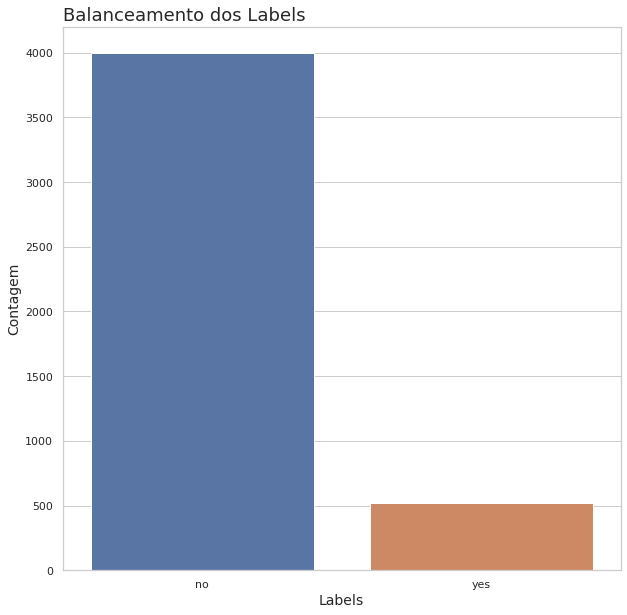

In [8]:
# uma análise gráfica do balanceamento das labels 
sns.set_theme(style= "whitegrid")

ax = sns.countplot(x="y", data=df1)
ax.set_ylabel('Contagem', fontsize = 14)
ax.set_xlabel('Labels', fontsize = 14)
ax.set_title('Balanceamento dos Labels', fontsize = 18, loc = 'left')

Text(0.0, 1.0, 'Balanceamento dos Labels')

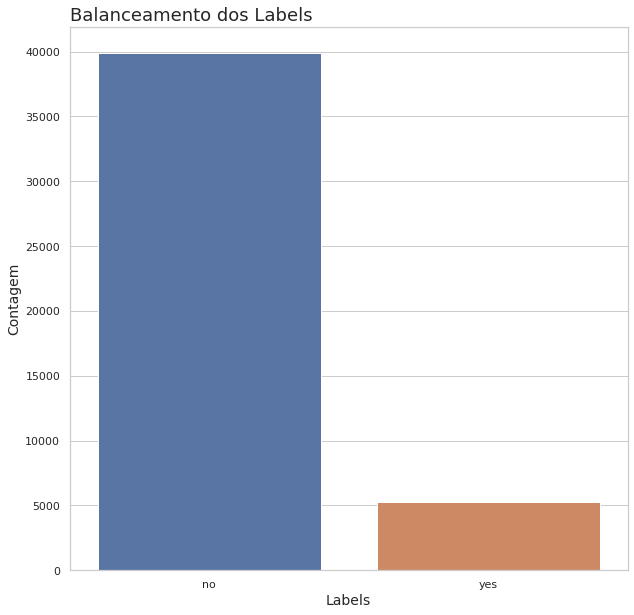

In [9]:
sns.set_theme(style= "whitegrid")

ax = sns.countplot(x="y", data=df2)
ax.set_ylabel('Contagem', fontsize = 14)
ax.set_xlabel('Labels', fontsize = 14)
ax.set_title('Balanceamento dos Labels', fontsize = 18, loc = 'left')

Dessa forma, percebe-se que existe um desbalanceamento nos dados que pode prejudicar a eficiencia de classificação do modelo. Assim, é necessário uma nova espécie de tratamento.

In [10]:
# concatenando as bases de dados 

df = pd.concat([df1, df2], axis=0)

In [11]:
df.shape

(49732, 17)

In [12]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## mapeando a base de dados 

In [13]:

a_trocar = {
    'yes': 1,
    'no': 0
}
df['default'] = df['default'].map(a_trocar)
df['housing'] = df['housing'].map(a_trocar)
df['loan'] = df['loan'].map(a_trocar)
df['y'] = df['y'].map(a_trocar)


In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [15]:
x = ['admin',"unknown","unemployed","management","housemaid","entrepreneur","student",
     "self-employed","retired","technician","services"]

selecao = df['job'].isin(x)
selecao.head(10)

df = df[selecao]

In [16]:
df['job'].value_counts()

management       10427
technician        8365
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

In [17]:
df['marital'].value_counts()

married     19391
single       9927
divorced     4087
Name: marital, dtype: int64

In [18]:
df['education'].value_counts()

secondary    15001
tertiary     13867
primary       3176
unknown       1361
Name: education, dtype: int64

In [19]:
# mudando fazendo alterações nas variáveis e samples

# renomeando as variáveis 
a_trocar = {
  'age': 'idade',    
  'job': 'trabalho',
  'marital': 'estado civil',
  'education': 'escolaridade',
  'default': 'inadimplencia',
  'balance': 'renda (euros)',
  'housing': 'credito habitacao',
  'loan': 'tomada de emprestimo',
  'contact': 'contato',
  'day': 'dia (mes)',
  'month': 'mes',
  'duration': 'duracao (contato)',
  'campaign': 'campanha',
  'y': 'realizou deposito'
}


df.rename(columns =  {
  'age': 'idade',    
  'job': 'trabalho',
  'marital': 'estado civil',
  'education': 'escolaridade',
  'default': 'inadimplencia',
  'balance': 'renda (euros)',
  'housing': 'credito habitacao',
  'loan': 'tomada de emprestimo',
  'contact': 'contato',
  'day': 'dia (mes)',
  'month': 'mes',
  'duration': 'duracao (contato)',
  'campaign': 'campanha',
  'y': 'realizou deposito'
}, inplace = True )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df.head(10)

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
5,35,management,single,tertiary,0,747,0,0,cellular,23,feb,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,0,307,1,0,cellular,14,may,341,1,330,2,other,0
7,39,technician,married,secondary,0,147,1,0,cellular,6,may,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,0,221,1,0,unknown,14,may,57,2,-1,0,unknown,0
9,43,services,married,primary,0,-88,1,1,cellular,17,apr,313,1,147,2,failure,0
10,39,services,married,secondary,0,9374,1,0,unknown,20,may,273,1,-1,0,unknown,0


In [21]:
# mapeamento das samples 

df['trabalho'].value_counts()

management       10427
technician        8365
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: trabalho, dtype: int64

In [22]:
a_trocar = { 
    'management': 1,
    'technician': 2,
    'services': 3,
    'retired': 4,
    'self-employed': 5,
    'entrepreneur': 6,
    'unemployed': 7,
    'housemaid': 8,
    'student': 9,
    'unknown': 10
}


df['trabalho'] = df['trabalho'].map(a_trocar)


In [23]:
df['trabalho'].value_counts()

1     10427
2      8365
3      4571
4      2494
5      1762
6      1655
7      1431
8      1352
9      1022
10      326
Name: trabalho, dtype: int64

In [24]:
df.head()

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
0,30,7,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,3,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,1,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,1,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
5,35,1,single,tertiary,0,747,0,0,cellular,23,feb,141,2,176,3,failure,0


In [25]:
df['estado civil'].value_counts()

married     19391
single       9927
divorced     4087
Name: estado civil, dtype: int64

In [26]:
a_trocar = {
    'married': 1,
    'single': 2,
    'divorced': 3
}

df['estado civil'] = df['estado civil'].map(a_trocar)


In [27]:
df['estado civil'].value_counts()

1    19391
2     9927
3     4087
Name: estado civil, dtype: int64

In [28]:
df['escolaridade'].value_counts()

secondary    15001
tertiary     13867
primary       3176
unknown       1361
Name: escolaridade, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33405 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   idade                 33405 non-null  int64 
 1   trabalho              33405 non-null  int64 
 2   estado civil          33405 non-null  int64 
 3   escolaridade          33405 non-null  object
 4   inadimplencia         33405 non-null  int64 
 5   renda (euros)         33405 non-null  int64 
 6   credito habitacao     33405 non-null  int64 
 7   tomada de emprestimo  33405 non-null  int64 
 8   contato               33405 non-null  object
 9   dia (mes)             33405 non-null  int64 
 10  mes                   33405 non-null  object
 11  duracao (contato)     33405 non-null  int64 
 12  campanha              33405 non-null  int64 
 13  pdays                 33405 non-null  int64 
 14  previous              33405 non-null  int64 
 15  poutcome              33405 non-null

In [30]:
a_trocar = {
    'secondary': 2,
    'tertiary': 3,
    'primary': 1,
    'unknown': 0
}

df['escolaridade'] = df['escolaridade'].map(a_trocar)

In [31]:
df.head()

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
0,30,7,1,1,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,3,1,2,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,1,2,3,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,1,1,3,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
5,35,1,2,3,0,747,0,0,cellular,23,feb,141,2,176,3,failure,0


In [32]:
df['poutcome'].value_counts()

unknown    27302
failure     3520
other       1332
success     1251
Name: poutcome, dtype: int64

In [33]:
a_trocar = {
    'unknown': 3,
    'failure': 0,
    'other': 2,
    'success': 1
}


df['poutcome'] = df['poutcome'].map(a_trocar)

In [34]:
df.head()

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
0,30,7,1,1,0,1787,0,0,cellular,19,oct,79,1,-1,0,3,0
1,33,3,1,2,0,4789,1,1,cellular,11,may,220,1,339,4,0,0
2,35,1,2,3,0,1350,1,0,cellular,16,apr,185,1,330,1,0,0
3,30,1,1,3,0,1476,1,1,unknown,3,jun,199,4,-1,0,3,0
5,35,1,2,3,0,747,0,0,cellular,23,feb,141,2,176,3,0,0


In [35]:
a_trocar = {
    'cellular': 1,
    'telephone': 2,
    'unknown': 0
}

df['contato'] = df['contato'].map(a_trocar)

In [36]:
df.head()

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
0,30,7,1,1,0,1787,0,0,1,19,oct,79,1,-1,0,3,0
1,33,3,1,2,0,4789,1,1,1,11,may,220,1,339,4,0,0
2,35,1,2,3,0,1350,1,0,1,16,apr,185,1,330,1,0,0
3,30,1,1,3,0,1476,1,1,0,3,jun,199,4,-1,0,3,0
5,35,1,2,3,0,747,0,0,1,23,feb,141,2,176,3,0,0


In [37]:
df['mes'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jul', 'nov', 'jan',
       'sep', 'mar', 'dec'], dtype=object)

In [38]:
a_trocar = {
   'oct': 10,
   'may': 5,
   'apr': 4,
   'jun': 6,
   'feb': 2,
   'aug': 8,
   'jul': 7,
   'nov': 11,
   'jan': 1,
   'sep': 9,
   'mar': 3,
   'dec': 12
}

df['mes'] = df['mes'].map(a_trocar)

In [39]:
df.head()

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
0,30,7,1,1,0,1787,0,0,1,19,10,79,1,-1,0,3,0
1,33,3,1,2,0,4789,1,1,1,11,5,220,1,339,4,0,0
2,35,1,2,3,0,1350,1,0,1,16,4,185,1,330,1,0,0
3,30,1,1,3,0,1476,1,1,0,3,6,199,4,-1,0,3,0
5,35,1,2,3,0,747,0,0,1,23,2,141,2,176,3,0,0


In [40]:
df.corr().round(2)

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
idade,1.00,0.05,-0.13,-0.21,-0.01,0.09,-0.18,-0.01,0.09,-0.01,0.08,0.01,-0.02,-0.02,0.00,-0.01,0.04
trabalho,0.05,1.00,-0.01,-0.36,0.00,-0.01,-0.12,-0.04,0.02,-0.03,-0.04,0.01,-0.03,-0.01,-0.01,0.01,0.03
estado civil,-0.13,-0.01,1.00,0.06,0.01,-0.03,0.01,-0.02,-0.03,-0.00,-0.05,0.02,-0.02,0.02,0.00,-0.00,0.04
escolaridade,-0.21,-0.36,0.06,1.00,-0.01,0.04,0.04,0.00,0.03,0.02,0.05,0.00,0.02,0.02,0.02,-0.03,0.02
inadimplencia,-0.01,0.00,0.01,-0.01,1.00,-0.07,0.00,0.08,-0.02,0.01,0.02,-0.01,0.02,-0.03,-0.02,0.04,-0.03
renda (euros),0.09,-0.01,-0.03,0.04,-0.07,1.00,-0.05,-0.08,0.04,-0.00,0.08,0.02,-0.02,0.01,0.02,-0.03,0.05
credito habitacao,-0.18,-0.12,0.01,0.04,0.00,-0.05,1.00,0.07,-0.20,-0.02,-0.15,-0.00,-0.02,0.12,0.04,-0.07,-0.14
tomada de emprestimo,-0.01,-0.04,-0.02,0.00,0.08,-0.08,0.07,1.00,-0.02,0.01,0.01,-0.02,0.01,-0.02,-0.01,0.03,-0.08
contato,0.09,0.02,-0.03,0.03,-0.02,0.04,-0.20,-0.02,1.00,0.04,0.16,0.00,0.03,0.19,0.12,-0.21,0.13
dia (mes),-0.01,-0.03,-0.00,0.02,0.01,-0.00,-0.02,0.01,0.04,1.00,0.10,-0.03,0.17,-0.10,-0.05,0.09,-0.03


In [41]:
df.head(15)

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
0,30,7,1,1,0,1787,0,0,1,19,10,79,1,-1,0,3,0
1,33,3,1,2,0,4789,1,1,1,11,5,220,1,339,4,0,0
2,35,1,2,3,0,1350,1,0,1,16,4,185,1,330,1,0,0
3,30,1,1,3,0,1476,1,1,0,3,6,199,4,-1,0,3,0
5,35,1,2,3,0,747,0,0,1,23,2,141,2,176,3,0,0
6,36,5,1,3,0,307,1,0,1,14,5,341,1,330,2,2,0
7,39,2,1,2,0,147,1,0,1,6,5,151,2,-1,0,3,0
8,41,6,1,3,0,221,1,0,0,14,5,57,2,-1,0,3,0
9,43,3,1,1,0,-88,1,1,1,17,4,313,1,147,2,0,0
10,39,3,1,2,0,9374,1,0,0,20,5,273,1,-1,0,3,0


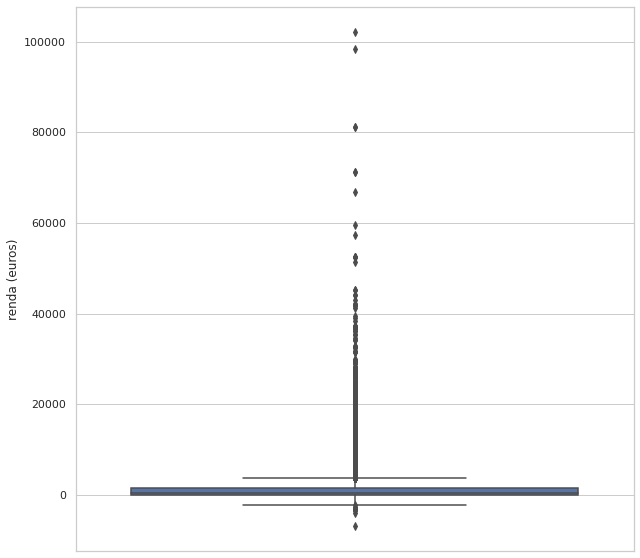

In [42]:
ax = sns.boxplot(y=df['renda (euros)'])

In [43]:
df['renda (euros)'].describe().round(2)

count     33405.00
mean       1497.86
std        3313.68
min       -6847.00
25%          79.00
50%         479.00
75%        1562.00
max      102127.00
Name: renda (euros), dtype: float64

## Análise Gráfica

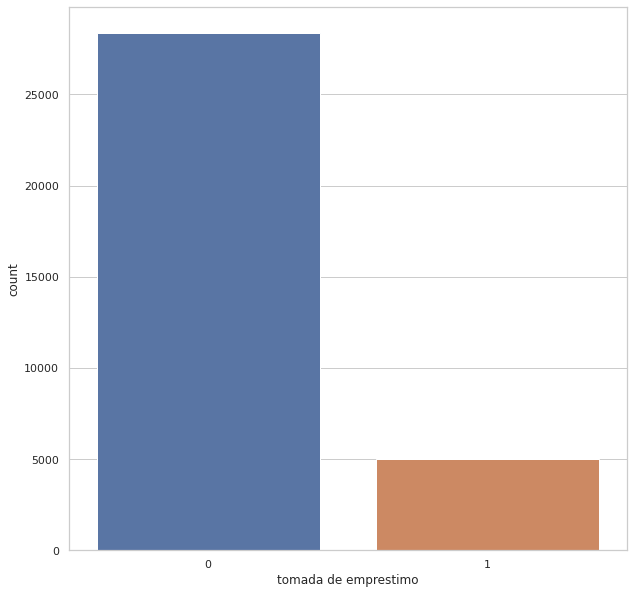

In [44]:
sns.countplot(x = 'tomada de emprestimo', data = df)

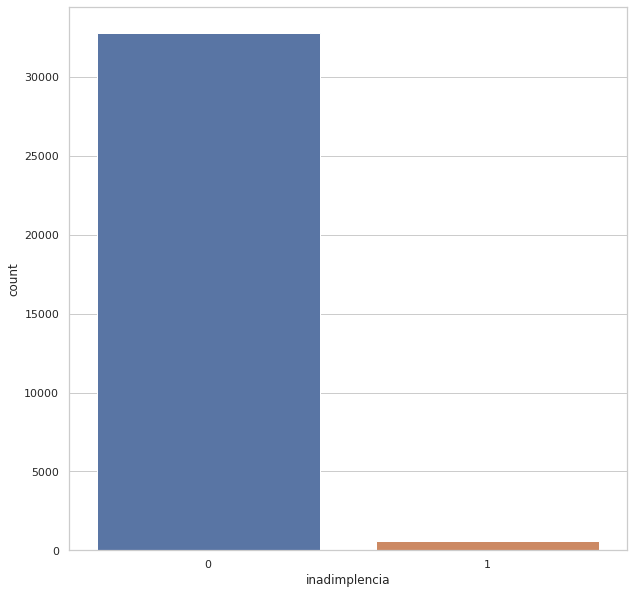

In [45]:
sns.countplot(x = 'inadimplencia', data = df)

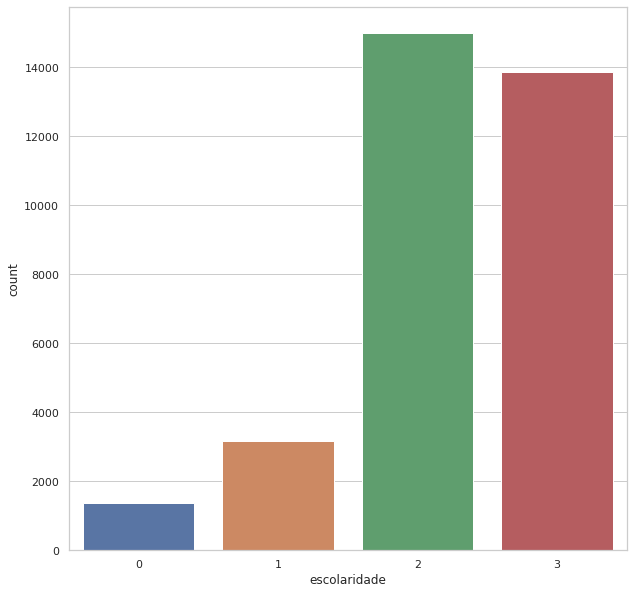

In [46]:
sns.countplot(x = 'escolaridade', data = df)


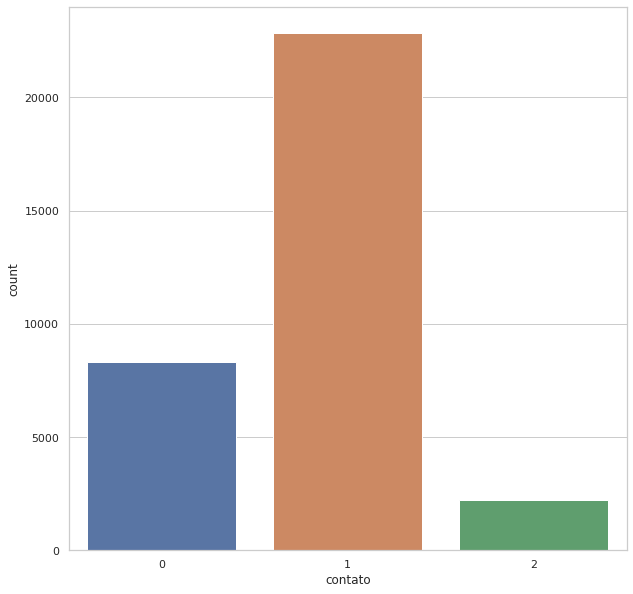

In [47]:
sns.countplot(x = 'contato', data = df)

In [48]:
df.head()

,idade,trabalho,estado civil,escolaridade,inadimplencia,renda (euros),credito habitacao,tomada de emprestimo,contato,dia (mes),mes,duracao (contato),campanha,pdays,previous,poutcome,realizou deposito
0,30,7,1,1,0,1787,0,0,1,19,10,79,1,-1,0,3,0
1,33,3,1,2,0,4789,1,1,1,11,5,220,1,339,4,0,0
2,35,1,2,3,0,1350,1,0,1,16,4,185,1,330,1,0,0
3,30,1,1,3,0,1476,1,1,0,3,6,199,4,-1,0,3,0
5,35,1,2,3,0,747,0,0,1,23,2,141,2,176,3,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33405 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   idade                 33405 non-null  int64
 1   trabalho              33405 non-null  int64
 2   estado civil          33405 non-null  int64
 3   escolaridade          33405 non-null  int64
 4   inadimplencia         33405 non-null  int64
 5   renda (euros)         33405 non-null  int64
 6   credito habitacao     33405 non-null  int64
 7   tomada de emprestimo  33405 non-null  int64
 8   contato               33405 non-null  int64
 9   dia (mes)             33405 non-null  int64
 10  mes                   33405 non-null  int64
 11  duracao (contato)     33405 non-null  int64
 12  campanha              33405 non-null  int64
 13  pdays                 33405 non-null  int64
 14  previous              33405 non-null  int64
 15  poutcome              33405 non-null  int64
 16  real

# Iniciando a seperação dos datasets para treinamento dos modelos 

In [50]:
# importando as bibliotecas 

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree

In [51]:
# instanciando o divisor dos datasetes 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state=2811)

In [52]:
# seperando as labels das features 

x = df.drop('realizou deposito', axis = 1).values

In [53]:
y = df['realizou deposito'].values
y

array([0, 0, 0, ..., 1, 1, 0])

In [54]:
#  criando a função de divisor dos datasets 

def divisor(x,y):
  for train_df, test_df in split.split(x,y):
    x_train, x_test = x[train_df], x[test_df]
    y_train, y_test = y[train_df], y[test_df]
    return x_train, x_test, y_train, y_test

In [55]:
x_train, x_test, y_train, y_test = divisor(x,y)

In [56]:
x_train

array([[43,  1,  1, ..., -1,  0,  3],
       [60,  5,  1, ..., -1,  0,  3],
       [40,  2,  1, ..., -1,  0,  3],
       ...,
       [73,  4,  3, ..., -1,  0,  3],
       [25,  1,  1, ..., -1,  0,  3],
       [36,  5,  2, ..., -1,  0,  3]])

In [57]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [58]:
x_train.shape

(23383, 16)

In [59]:
df.shape

(33405, 17)

In [60]:
# criando a função de ajustamento e treinamento do modelo
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier(random_state= 2811)

def executar_clf(clf_arvore, x_train, x_test,  y_train):
  clf_arvore = DecisionTreeClassifier(random_state= 2811)
  clf_arvore.fit(x_train, y_train)
  y_pred = clf_arvore.predict(x_test)
  return y_pred

In [61]:
%time
y_pred_arv = executar_clf(clf_arvore, x_train, x_test, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [62]:
# verificando as métricas do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [63]:
print(accuracy_score(y_pred_arv, y_test))
print(precision_score(y_pred_arv, y_test))
print(recall_score(y_pred_arv, y_test))

0.8835561764118939
0.5709900230237912
0.5502958579881657


In [64]:
from sklearn.dummy import DummyClassifier

clf_Dummy = DummyClassifier(strategy = 'most_frequent')

clf_Dummy.fit(x_train, y_train)



DummyClassifier(strategy='most_frequent')

In [65]:
clf_Dummy.score(x_test, y_test)

0.8699860307323888

In [66]:
print(confusion_matrix(y_pred_arv, y_test))

[[8111  559]
 [ 608  744]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


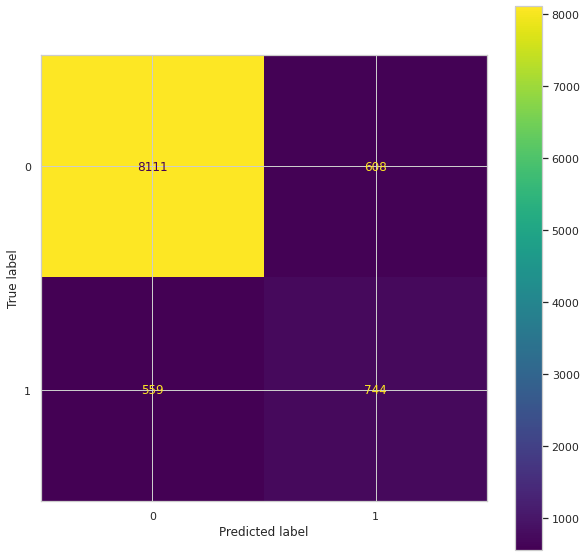

In [67]:
clf = DecisionTreeClassifier(random_state= 2811)
clf.fit(x_train, y_train)
plot_confusion_matrix(clf, x_test, y_test)

In [68]:
print(clf_arvore.max_depth)

None


Dessa forma, verifica-se que esse modelo não possuiu muita eficiencia na hora de realizar as previsões, dado que ele possui uma precisão de 57% que comparada a um recall de 55% não apresentou um desempenho satisfatório. Isto é, da proporção dos acertos do modelo ao prever depósitos em relação as previsões que ele fez sobre quantos depósitos seriam realizados, ele apenas alcançou um acerto de 55%.

# Otimizando o modelo:

In [69]:
# Utilizando árvores de decisões mais complexas 

# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [70]:
clf_random_forest = RandomForestClassifier(n_estimators=10000, random_state=2811)

In [71]:
%time
clf_random_forest.fit(x_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.48 µs


RandomForestClassifier(n_estimators=10000, random_state=2811)

In [72]:
y_pred_random = clf_random_forest.predict(x_test)

In [73]:
print(accuracy_score(y_pred_random, y_test))
print(precision_score(y_pred_random, y_test))
print(recall_score(y_pred_random, y_test))

0.9076032727998403
0.5257099002302379
0.6898288016112789


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


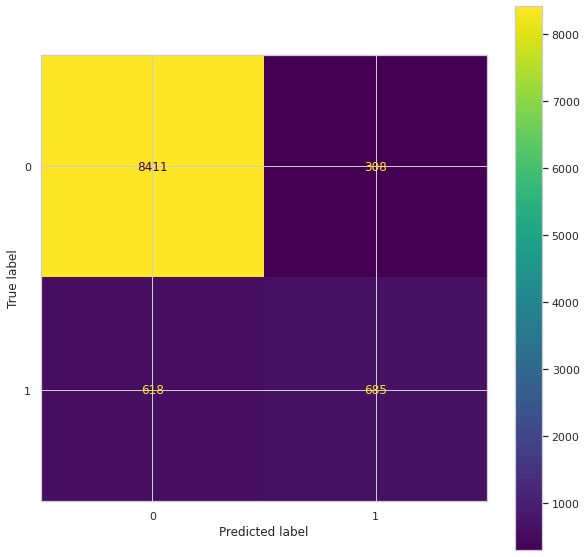

In [74]:
plot_confusion_matrix(clf_random_forest, x_test, y_test)

In [75]:
# alterando os parametros 

clf_random_forest = RandomForestClassifier(n_estimators=1000, random_state=2811)

In [76]:
%time
clf_random_forest.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


RandomForestClassifier(n_estimators=1000, random_state=2811)

In [77]:
y_pred_random = clf_random_forest.predict(x_test)

In [78]:
print(accuracy_score(y_pred_random, y_test))
print(precision_score(y_pred_random, y_test))
print(recall_score(y_pred_random, y_test))

0.9072041508680903
0.5280122793553338
0.6859421734795613


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


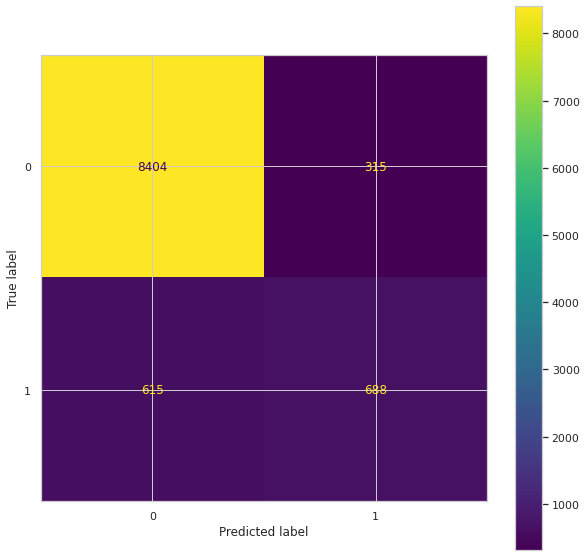

In [79]:
plot_confusion_matrix(clf_random_forest, x_test, y_test)

In [80]:
# reduzindo o número de estimadores 

clf_random_forest = RandomForestClassifier(n_estimators=500, random_state=2811)

In [81]:
%time
clf_random_forest.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


RandomForestClassifier(n_estimators=500, random_state=2811)

In [82]:
y_pred_random = clf_random_forest.predict(x_test)

In [83]:
print(accuracy_score(y_pred_random, y_test))
print(precision_score(y_pred_random, y_test))
print(recall_score(y_pred_random, y_test))

0.9074037118339653
0.5303146584804298
0.6861966236345581


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


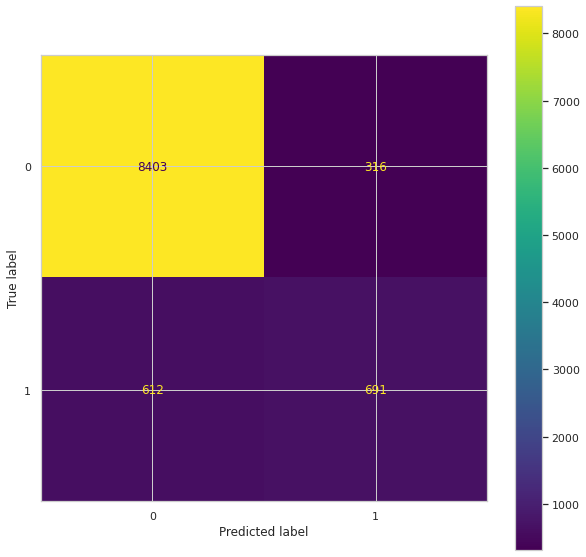

In [84]:
plot_confusion_matrix(clf_random_forest, x_test, y_test)


In [85]:
print(clf_random_forest.max_depth)

None


In [86]:
# aplicando restrição de profundidade 

clf_random_forest = RandomForestClassifier(n_estimators=500, random_state=2811, max_depth=5)

In [87]:
%time
clf_random_forest.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


RandomForestClassifier(max_depth=5, n_estimators=500, random_state=2811)

In [88]:
y_pred_random = clf_random_forest.predict(x_test)

In [89]:
print(accuracy_score(y_pred_random, y_test))
print(precision_score(y_pred_random, y_test))
print(recall_score(y_pred_random, y_test))

0.8823588106166433
0.13660782808902533
0.7672413793103449


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


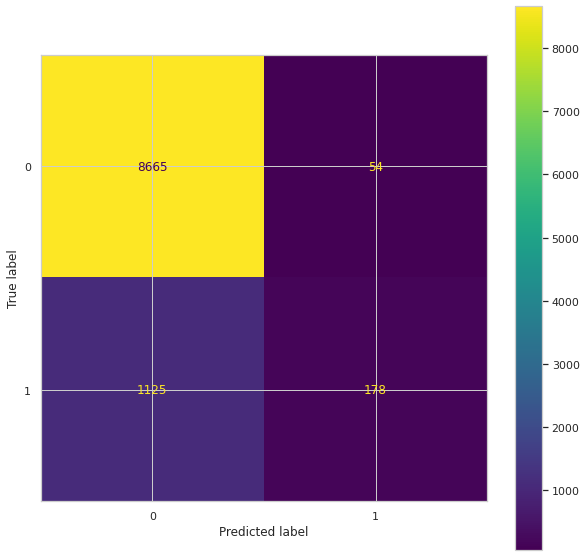

In [90]:
plot_confusion_matrix(clf_random_forest, x_test, y_test)

In [91]:
clf_random_forest = RandomForestClassifier(n_estimators=500, random_state=2811, max_depth=10)

In [92]:
%time
clf_random_forest.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


RandomForestClassifier(max_depth=10, n_estimators=500, random_state=2811)

In [93]:
y_pred_random = clf_random_forest.predict(x_test)

In [94]:
print(accuracy_score(y_pred_random, y_test))
print(precision_score(y_pred_random, y_test))
print(recall_score(y_pred_random, y_test))

0.898623029335462
0.3983115886415963
0.6910785619174434


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


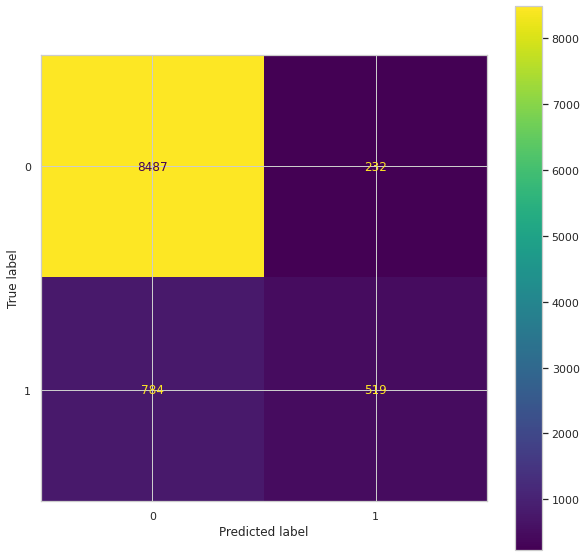

In [95]:
plot_confusion_matrix(clf_random_forest, x_test, y_test)

Aplicando um processo de otimização no modelo, conseguimos extrair um desempenho relativamente melhor. Isto é, da proporção de acertos do nosso modelo em relação às classificações que ele previu que seriam (realizações de depositos) houve um acerto de 68,98%. 

In [96]:
# Utilizando outro método de otimização 

from sklearn.ensemble import ExtraTreesClassifier

In [97]:
clf_extra = ExtraTreesClassifier(n_estimators=500, random_state=2811)

In [98]:
%time
clf_extra.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


ExtraTreesClassifier(n_estimators=500, random_state=2811)

In [99]:
y_pred_extra = clf_extra.predict(x_test)

In [100]:
print(accuracy_score(y_pred_extra, y_test))
print(precision_score(y_pred_extra, y_test))
print(recall_score(y_pred_extra, y_test))

0.9077030532827779
0.476592478894858
0.71875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


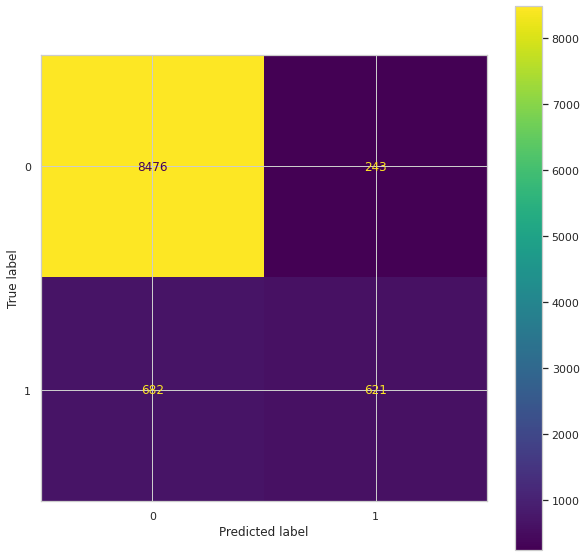

In [101]:
plot_confusion_matrix(clf_extra, x_test, y_test)

In [102]:
# alterando os parametros
clf_extra = ExtraTreesClassifier(n_estimators=1000, random_state=2811)

In [103]:
%time
clf_extra.fit(x_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


ExtraTreesClassifier(n_estimators=1000, random_state=2811)

In [104]:
y_pred_extra = clf_extra.predict(x_test)

In [105]:
print(accuracy_score(y_pred_extra, y_test))
print(precision_score(y_pred_extra, y_test))
print(recall_score(y_pred_extra, y_test))

0.9070045899022151
0.4742900997697621
0.7144508670520231


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


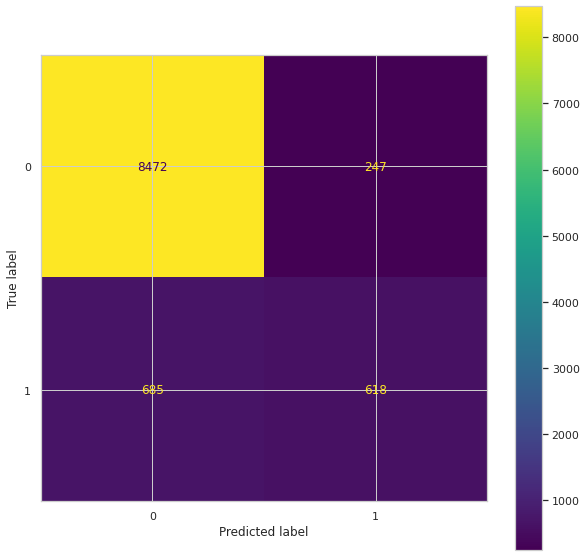

In [106]:
plot_confusion_matrix(clf_extra, x_test, y_test)

In [107]:
# aplicando restrição de profundidade

clf_extra = ExtraTreesClassifier(n_estimators=500, random_state=2811, max_depth=20)

In [108]:
%time
clf_extra.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


ExtraTreesClassifier(max_depth=20, n_estimators=500, random_state=2811)

In [109]:
y_pred_extra = clf_extra.predict(x_test)

In [110]:
print(accuracy_score(y_pred_extra, y_test))
print(precision_score(y_pred_extra, y_test))
print(recall_score(y_pred_extra, y_test))

0.904011175414089
0.40521872601688413
0.7384615384615385


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


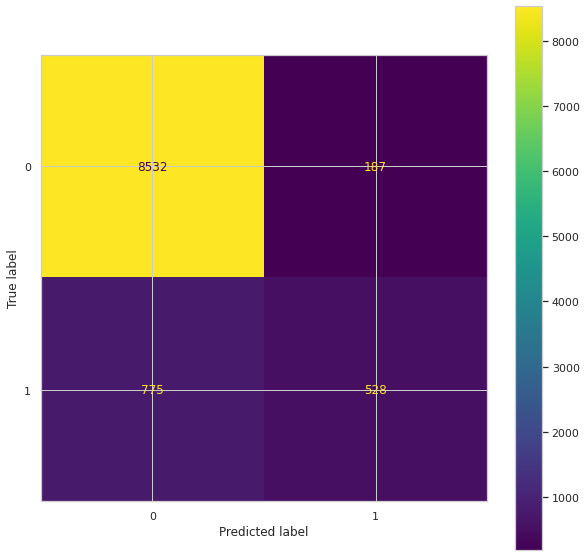

In [111]:
plot_confusion_matrix(clf_extra, x_test, y_test)

Aplicando esses outros métodos de otimização ainda se mantiveram estáveis as métricas do nosso modelo.

In [112]:
# empregando outro método de otimização 

from sklearn.ensemble import AdaBoostClassifier

In [113]:
clf_adaboost = AdaBoostClassifier(n_estimators=500, random_state=2811)

In [114]:
%time
clf_adaboost.fit(x_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


AdaBoostClassifier(n_estimators=500, random_state=2811)

In [115]:
y_pred_ada = clf_adaboost.predict(x_test)

In [116]:
print(accuracy_score(y_pred_ada, y_test))
print(precision_score(y_pred_ada, y_test))
print(recall_score(y_pred_ada, y_test))

0.889343444422271
0.4006139677666922
0.6141176470588235


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


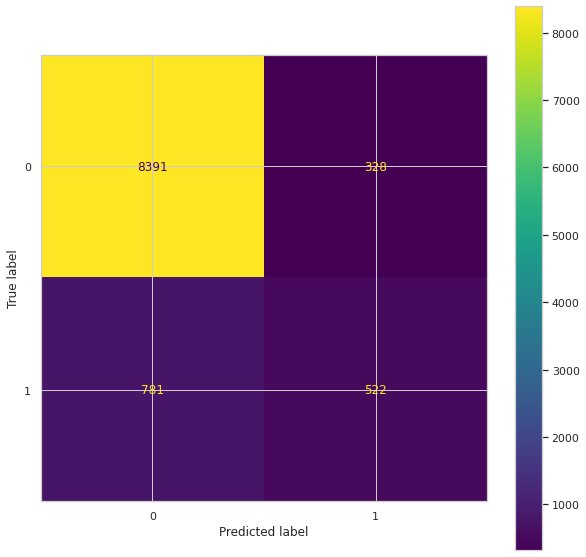

In [117]:
plot_confusion_matrix(clf_adaboost, x_test, y_test)

In [118]:
# alterando os parametros 

clf_adaboost = AdaBoostClassifier(n_estimators=1000, random_state=2811)

In [119]:
%time
clf_adaboost.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


AdaBoostClassifier(n_estimators=1000, random_state=2811)

In [120]:
y_pred_ada = clf_adaboost.predict(x_test)

In [121]:
print(accuracy_score(y_pred_ada, y_test))
print(precision_score(y_pred_ada, y_test))
print(recall_score(y_pred_ada, y_test))

0.8887447615246458
0.4006139677666922
0.6098130841121495


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


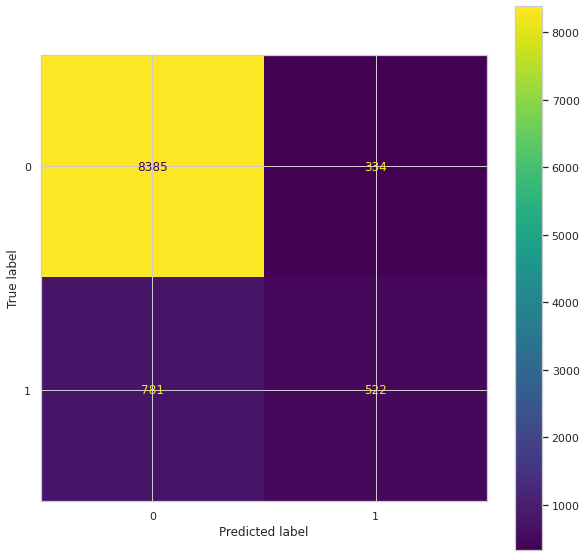

In [122]:
plot_confusion_matrix(clf_adaboost, x_test, y_test)

# Utilizando outro método de Classificação (SVM)

In [123]:
from sklearn import svm

In [124]:
clf_SVC = svm.SVC(random_state=2811)

In [125]:
%time
clf_SVC.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


SVC(random_state=2811)

In [126]:
y_pred_SVC = clf_SVC.predict(x_test)

In [127]:
print(accuracy_score(y_pred_SVC, y_test))
print(precision_score(y_pred_SVC, y_test))
print(recall_score(y_pred_SVC, y_test))

0.8701855916982638
0.015349194167306216
0.5263157894736842


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


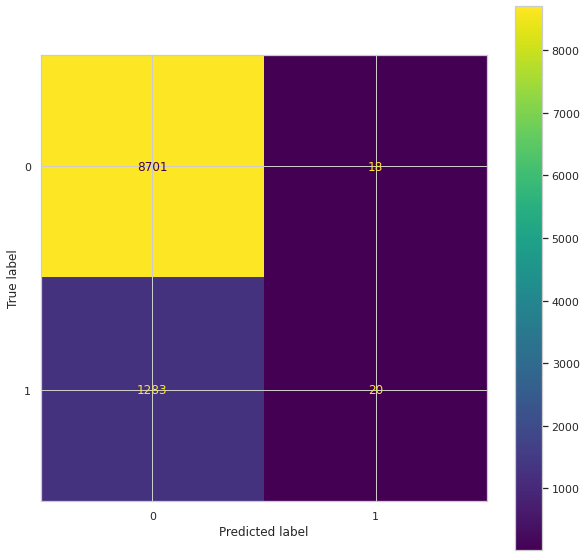

In [128]:
plot_confusion_matrix(clf_SVC, x_test, y_test)

Verifica-se também que esse modelo não apresentou um bom desempenho, visto que sua precisão foi de 01,53%

# Emrpregando o último modelo (Regressão Logística)

In [129]:
from sklearn.linear_model import LogisticRegression

In [132]:
LR = LogisticRegression(random_state=2811)

In [ ]:
LR.fit(x_train,y_train)

In [134]:
y_pred_LR = LR.predict(x_test)

In [135]:
print(accuracy_score(y_pred_LR, y_test))
print(precision_score(y_pred_LR, y_test))
print(recall_score(y_pred_LR, y_test))

0.8721812013570146
0.17574827321565617
0.5252293577981652


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


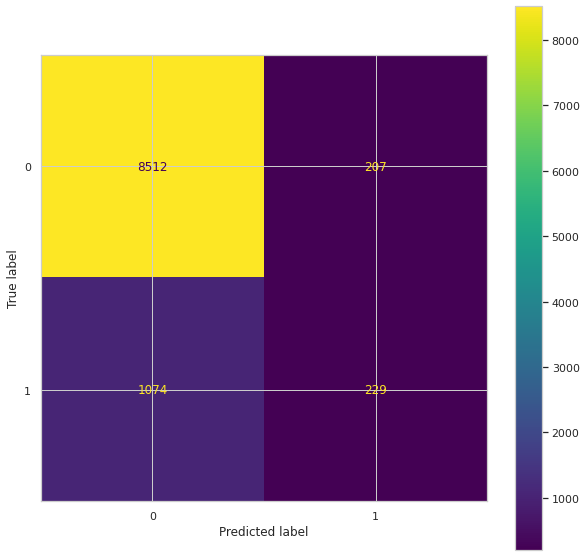

In [136]:
plot_confusion_matrix(LR, x_test, y_test)

# Apuração dos diferentes métodos 

In [142]:
print('Classificação da Arvore de Decisão simples (acurácia) = {}'.format(accuracy_score(y_pred_arv, y_test)))
print('Classificação da Arvore de Decisão simples (precisão) = {}'.format(precision_score(y_pred_arv, y_test)))
print('Classificação da Arvore de Decisão simples (recall) = {}'.format(recall_score(y_pred_arv, y_test)))

print('-----------')

print('Classificação do Random Forest (acurácia) = {}'.format(accuracy_score(y_pred_random, y_test)))
print('Classificação do Random Forest (precisão) = {}'.format(precision_score(y_pred_random, y_test)))
print('Classificação do Random Forest (recall) = {}'.format(recall_score(y_pred_random, y_test)))


print('-----------')

print('Classificação de Arvores extramente randomizadas (acurácia) = {}'.format(accuracy_score(y_pred_extra, y_test)))
print('Classificação de Arvores extramente randomizadas (precisão) = {}'.format(precision_score(y_pred_extra, y_test)))
print('Classificação de Arvores extramente randomizadas (recall) = {}'.format(recall_score(y_pred_extra, y_test)))

print('-----------')

print('Classificação do AdaBoost (acurácia) = {}'.format(accuracy_score(y_pred_ada, y_test)))
print('Classificação do AdaBoost (precisão) = {}'.format(precision_score(y_pred_ada, y_test)))
print('Classificação do AdaBoost (recall) = {}'.format(recall_score(y_pred_ada, y_test)))

print('-----------')

print('Classificação do SVM (acurácia) = {}'.format(accuracy_score(y_pred_SVC, y_test)))
print('Classificação do SVM (precisão) = {}'.format(precision_score(y_pred_SVC, y_test)))
print('Classificação do SVM (recall) = {}'.format(recall_score(y_pred_SVC, y_test)))

print('-----------')

print('Classificação do Logistic Regression (acurácia) = {}'.format(accuracy_score(y_pred_LR, y_test)))
print('Classificação do Logistic Regression (precisão) = {}'.format(precision_score(y_pred_LR, y_test)))
print('Classificação do Logistic Regression (recall) = {}'.format(recall_score(y_pred_LR, y_test)))

Classificação da Arvore de Decisão simples (acurácia) = 0.8835561764118939
Classificação da Arvore de Decisão simples (precisão) = 0.5709900230237912
Classificação da Arvore de Decisão simples (recall) = 0.5502958579881657
-----------
Classificação do Random Forest (acurácia) = 0.898623029335462
Classificação do Random Forest (precisão) = 0.3983115886415963
Classificação do Random Forest (recall) = 0.6910785619174434
-----------
Classificação de Arvores extramente randomizadas (acurácia) = 0.904011175414089
Classificação de Arvores extramente randomizadas (precisão) = 0.40521872601688413
Classificação de Arvores extramente randomizadas (recall) = 0.7384615384615385
-----------
Classificação do AdaBoost (acurácia) = 0.8887447615246458
Classificação do AdaBoost (precisão) = 0.4006139677666922
Classificação do AdaBoost (recall) = 0.6098130841121495
-----------
Classificação do SVM (acurácia) = 0.8701855916982638
Classificação do SVM (precisão) = 0.015349194167306216
Classificação do SVM (

Assim, ao comparar todos os métodos de modelagem, verifica-se que, pela consistência, o melhor modelo de classificação a ser implementado para avaliar o impacto do marketing bancário na prospecção dos clientes e, assim, poder realizar previsões dos depósitos decorrentes dessa prospecção.